In [168]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: fix this lol
%cd ..
from helpers.labellines import *
%cd analysis/

/mnt/z/personal_storage/Documents/apersonal_documents/formula/magic_moment_method
/mnt/z/personal_storage/Documents/apersonal_documents/formula/magic_moment_method/analysis


x label location is outside data range!
x label location is outside data range!
x label location is outside data range!
x label location is outside data range!


Text(0.5, 1.0, 'Milliken Moment Method \n Blue -> Discrete Steered Angle (deg); Red -> Discrete Body Slip (deg)')

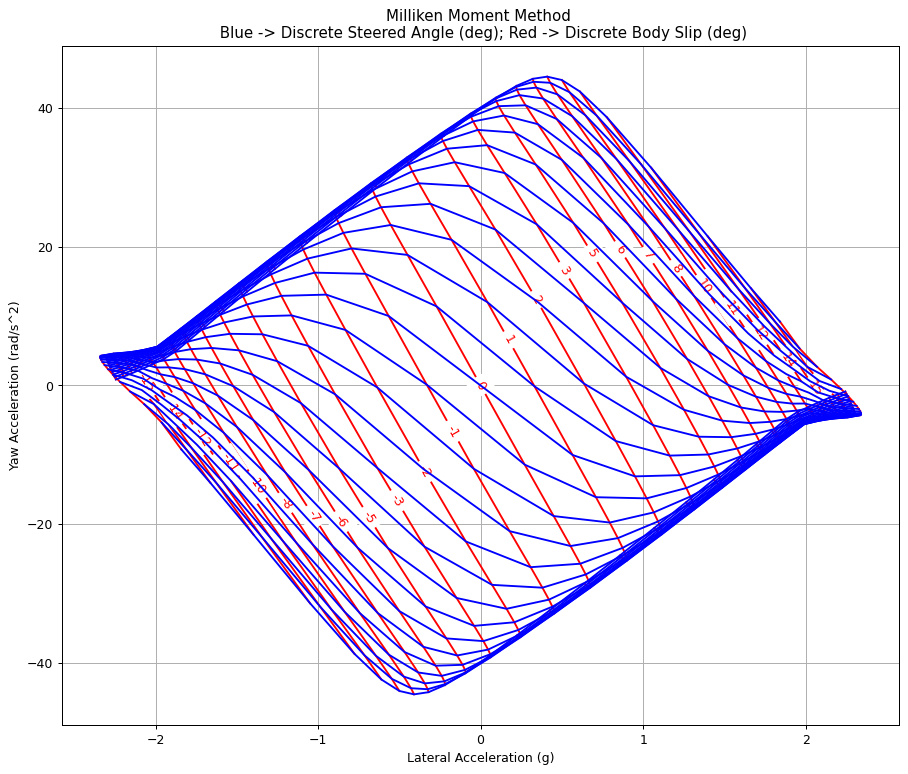

In [169]:
df = pd.read_csv("MMM.csv")

fig = plt.figure(figsize=(12, 10), dpi=90)
#ax = fig.add_subplot(111)

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    lat_accel = list(df2["vehicle_accelerations_NTB_1"]/9.81)
    yaw_accel = list(df2["yaw_acceleration"])
    
    mid_df = df2.iloc[(df2["vehicle_accelerations_NTB_1"]-df2["vehicle_accelerations_NTB_1"].mean()).abs().argsort().iloc[0]]

    plt.plot(lat_accel, yaw_accel, 'r', label = int(x*180/np.pi))
    #plt.text(mid_df["vehicle_accelerations_NTB_1"]/9.81, mid_df["yaw_acceleration"], '{0:.1f}'.format(x*180/math.pi), color = 'r')


labelLines(plt.gca().get_lines(),zorder=2)

for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        plt.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'b', label = int(x*180/np.pi))
plt.grid()
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.xlabel("Lateral Acceleration (g)")
plt.title("Milliken Moment Method \n Blue -> Discrete Steered Angle (deg); Red -> Discrete Body Slip (deg)")

#labelLines(plt.gca().get_lines(),zorder=2)

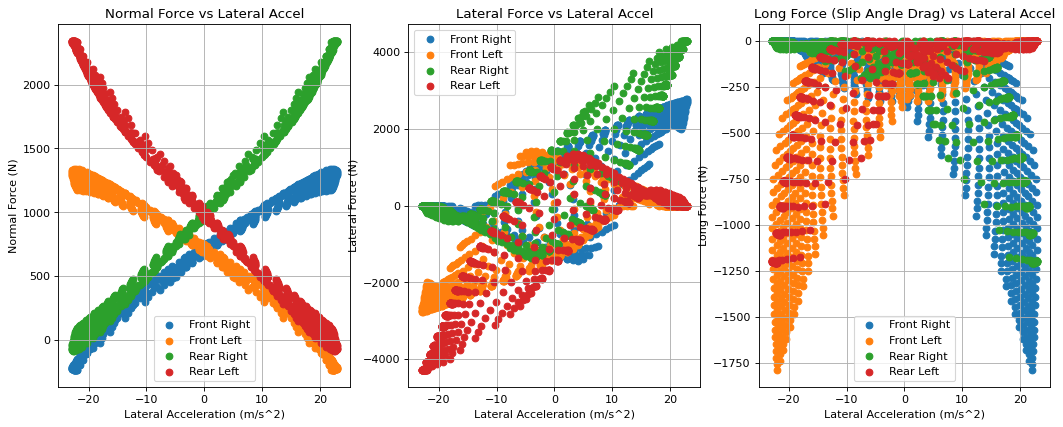

In [170]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_tire_centric_forces_2"], label = "Front Right")
axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_tire_centric_forces_2"], label = "Front Left")
axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_tire_centric_forces_2"], label = "Rear Right")
axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_tire_centric_forces_2"], label = "Rear Left")
axs[0].set_title("Normal Force vs Lateral Accel")
axs[0].grid()
axs[0].set_ylabel("Normal Force (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

axs[1].scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_vehicle_centric_forces_1"], label = "Front Right")
axs[1].scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_vehicle_centric_forces_1"], label = "Front Left")
axs[1].scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_vehicle_centric_forces_1"], label = "Rear Right")
axs[1].scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_vehicle_centric_forces_1"], label = "Rear Left")
axs[1].set_title("Lateral Force vs Lateral Accel")
axs[1].grid()
axs[1].set_ylabel("Lateral Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_vehicle_centric_forces_0"], label = "Front Right")
axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_vehicle_centric_forces_0"], label = "Front Left")
axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_vehicle_centric_forces_0"], label = "Rear Right")
axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_vehicle_centric_forces_0"], label = "Rear Left")
axs[2].set_title("Long Force (Slip Angle Drag) vs Lateral Accel")
axs[2].grid()
axs[2].set_ylabel("Long Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].legend()

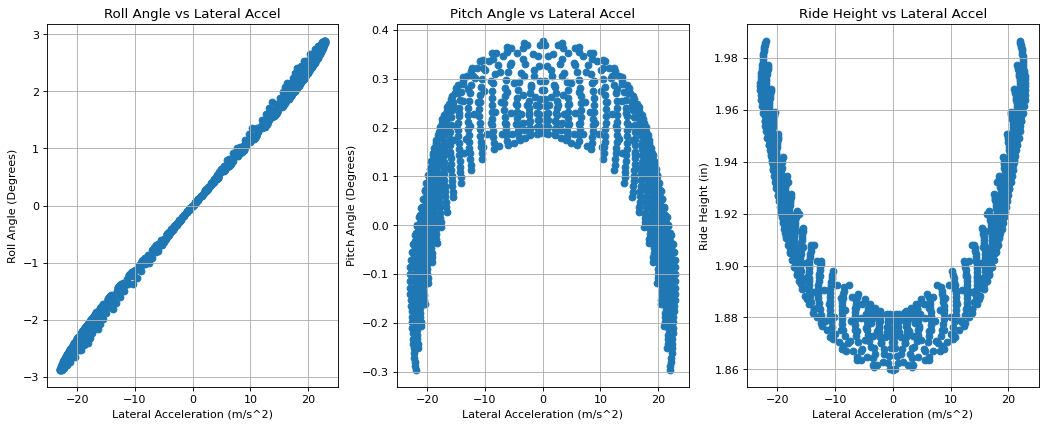

In [171]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['roll'] * (180 / np.pi))
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Roll Angle (Degrees)')
axs[0].set_title("Roll Angle vs Lateral Accel")
axs[0].grid()

axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['pitch'] * (180 / np.pi))
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].set_ylabel('Pitch Angle (Degrees)')
axs[1].set_title("Pitch Angle vs Lateral Accel")
axs[1].grid()

axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['ride_height']/.0254)
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].set_ylabel('Ride Height (in)')
axs[2].set_title("Ride Height vs Lateral Accel")
axs[2].grid()

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

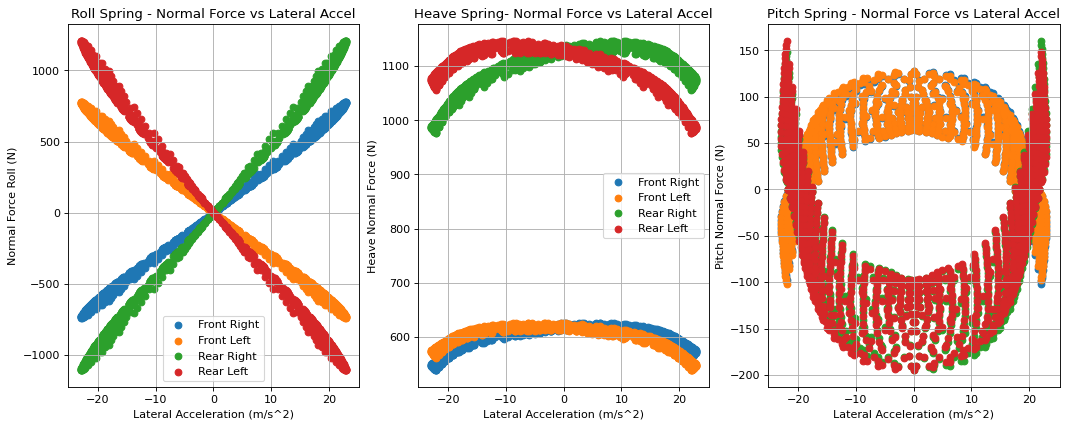

In [172]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_f_roll"], label = "Front Right")
axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_f_roll"], label = "Front Left")
axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_f_roll"], label = "Rear Right")
axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_f_roll"], label = "Rear Left")
axs[0].set_title("Roll Spring - Normal Force vs Lateral Accel")
axs[0].grid()
axs[0].set_ylabel("Normal Force Roll (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

axs[1].scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_f_heave"], label = "Front Right")
axs[1].scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_f_heave"], label = "Front Left")
axs[1].scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_f_heave"], label = "Rear Right")
axs[1].scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_f_heave"], label = "Rear Left")
axs[1].set_title("Heave Spring- Normal Force vs Lateral Accel")
axs[1].grid()
axs[1].set_ylabel("Heave Normal Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_f_pitch"], label = "Front Right")
axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_f_pitch"], label = "Front Left")
axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_f_pitch"], label = "Rear Right")
axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_f_pitch"], label = "Rear Left")
axs[2].set_title("Pitch Spring - Normal Force vs Lateral Accel")
axs[2].grid()
axs[2].set_ylabel("Pitch Normal Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")

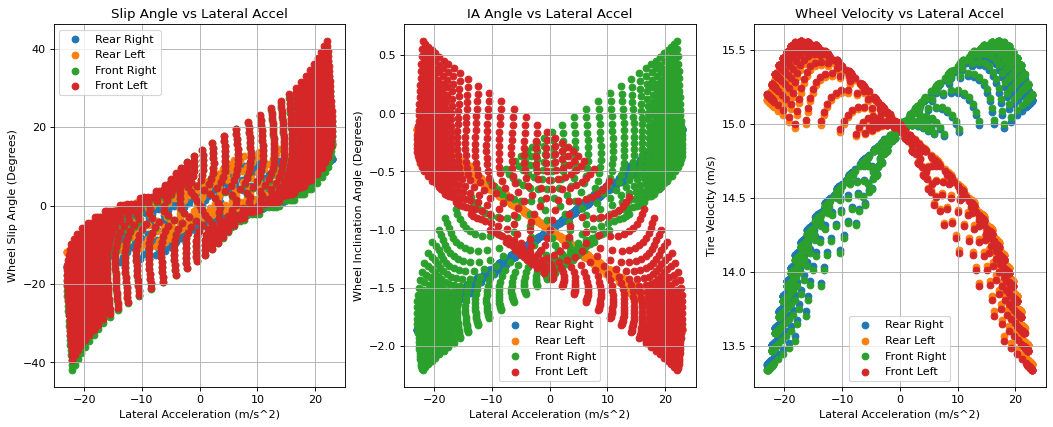

In [173]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_slip_angle'] * (180 / np.pi), label='Rear Right')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_slip_angle'] * (180 / np.pi), label='Rear Left')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_slip_angle'] * (180 / np.pi), label='Front Right')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_slip_angle'] * (180 / np.pi), label='Front Left')
axs[0].legend()
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Wheel Slip Angle (Degrees)')
axs[0].set_title("Slip Angle vs Lateral Accel")
axs[0].grid()

axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle'] * (180 / np.pi), label='Rear Right')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle'] * (180 / np.pi), label='Rear Left')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle'] * (180 / np.pi), label='Front Right')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_inclination_angle'] * (180 / np.pi), label='Front Left')
axs[1].legend()
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].set_ylabel('Wheel Inclination Angle (Degrees)')
axs[1].set_title("IA Angle vs Lateral Accel")
axs[1].grid()

axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_velocity_0'], label='Rear Right')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_velocity_0'], label='Rear Left')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_velocity_0'], label='Front Right')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_velocity_0'], label='Front Left')
axs[2].legend()
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].set_ylabel('Tire Velocity (m/s)')
axs[2].set_title("Wheel Velocity vs Lateral Accel")
axs[2].grid()

0.015445766102144879
0.0008848238224204543


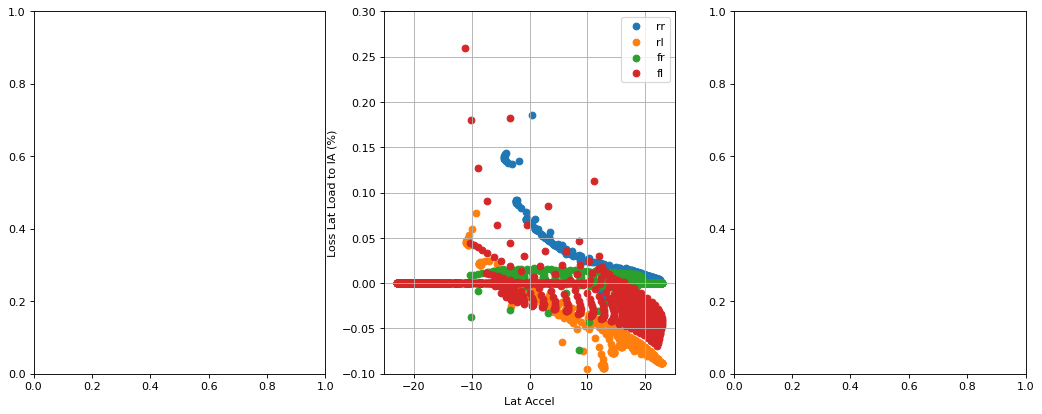

In [174]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

# axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_z_c"], label = "Front Right")
# axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_z_c"], label = "Front Left")
# axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_z_c"], label = "Rear Right")
# axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_z_c"], label = "Rear Left")
# axs[0].set_title("Vertical Chassis Displacement vs Lateral Accel")
# axs[0].grid()
# axs[0].set_ylabel("Vertical Chassis Displacement (m)")
# axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
# axs[0].legend()

axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle_percent_loss'], label='rr')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle_percent_loss'], label='rl')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle_percent_loss'], label='fr')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_inclination_angle_percent_loss'], label='fl')
axs[1].legend()
axs[1].set_xlabel('Lat Accel')
axs[1].set_ylabel('Loss Lat Load to IA (%)')
axs[1].set_ylim([-0.1,0.3])
axs[1].grid()
print(df['rear_right_tire_inclination_angle_percent_loss'].mean())
print(df['front_right_tire_inclination_angle_percent_loss'].mean())

# axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["dynamics_total_inclination_angle_percent_loss"])
# axs[2].grid()
# print(df['dynamics_total_inclination_angle_percent_loss'].mean())

In [175]:
x=df[abs(df["vehicle_accelerations_NTB_1"]) == abs(df["vehicle_accelerations_NTB_1"]).max()].iloc[0]
# for name, y in x.items():
#     print(name + ": " +str(y))
# print(x["y_double_dot"]/9.81)
# print(x["yaw_acceleration"])
# print(x["front_left_f_roll"])
# print(x["front_right_f_heave"]-x["front_left_f_heave"])
# print(x["rear_right_f_heave"]-x["rear_left_f_heave"])
# print(x["roll"]*180/math.pi)
print(x["front_left_tire_vehicle_centric_forces_0"])
print(x["front_left_tire_vehicle_centric_forces_1"])
print(x["front_left_tire_vehicle_centric_forces_2"])
print(x["rear_left_tire_vehicle_centric_forces_0"])
print(x["rear_left_tire_vehicle_centric_forces_1"])
print(x["rear_left_tire_vehicle_centric_forces_2"])
# print(x["front_right_tire_centric_forces_2"])
# print(x["rear_left_tire_centric_forces_2"])
# print(x["rear_right_tire_centric_forces_2"])
# print(x["front_left_tire_centric_forces_2"])
# print(x["front_right_tire_centric_forces_2"])
# print(x["rear_left_tire_centric_forces_2"])
# print(x["rear_right_tire_centric_forces_2"])
print("Max Lateral Accel:",x["vehicle_accelerations_NTB_1"])
print("Associated Turn Radius:",x["vehicle_turn_radius"])

-1018.6933880725172
2737.840091856656
1307.6746913717404
-1198.1306518997535
4291.726594454738
2341.105923760408
Max Lateral Accel: 22.966717937854536
Associated Turn Radius: 9.7967850961041


Text(0.5, 1.0, 'Turn Radius vs Lateral Accel (constant velocity)')

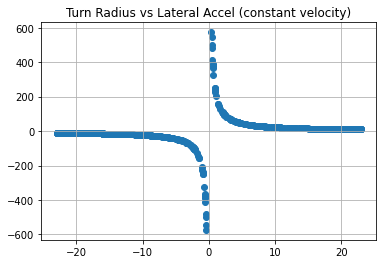

In [176]:
temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(temp_df["vehicle_accelerations_NTB_1"],temp_df["vehicle_turn_radius"])
plt.grid()
plt.title("Turn Radius vs Lateral Accel (constant velocity)")

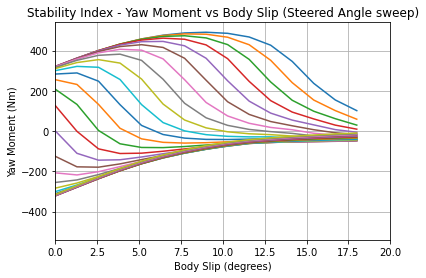

In [177]:
for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        plt.plot(df2["body_slip"] * 180/math.pi, df2["vehicle_yaw_moment"]/9.81)
plt.xlim([0, 20])
plt.title("Stability Index - Yaw Moment vs Body Slip (Steered Angle sweep)")
plt.ylabel("Yaw Moment (Nm)")
plt.xlabel("Body Slip (degrees)")
plt.grid(True)
plt.show()

/mnt/z/personal_storage/Documents/apersonal_documents/formula/magic_moment_method
/mnt/z/personal_storage/Documents/apersonal_documents/formula/magic_moment_method/analysis


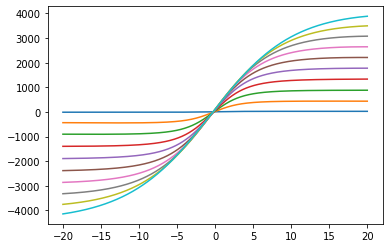

In [178]:
%cd ..
import engine
import vehicle_params
%cd analysis/
vehicle = engine.Vehicle(vehicle_params.EasyDriver())
slip_angles = np.linspace(-20, 20, 1000)
for normal_force in np.linspace(10, 2000, 10):
    output_force = [vehicle.suspension.tires.front_right.lateral_pacejka(0, normal_force, y/180*np.pi) for y in slip_angles]
    plt.plot(slip_angles, output_force)

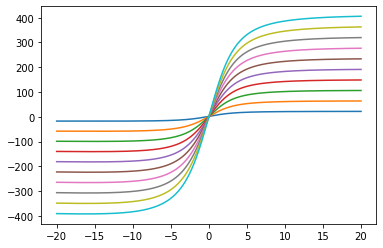

In [179]:
slip_angles = np.linspace(-20, 20, 1000)
for normal_force in np.linspace(10, 200, 10):
    output_force = [vehicle.suspension.tires.rear_right.lateral_pacejka(0, normal_force, y/180*np.pi) for y in slip_angles]
    plt.plot(slip_angles, output_force)

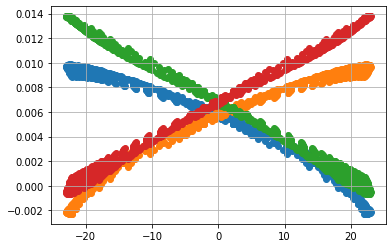

In [180]:
#temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(df["vehicle_accelerations_NTB_1"],df["front_right_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["front_left_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["rear_right_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["rear_left_tire_disp"])
plt.grid()

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

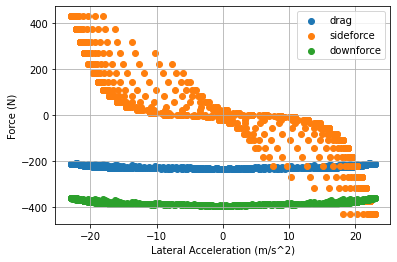

In [181]:
#temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_0"], label = "drag")
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_1"], label = "sideforce")
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_2"], label = "downforce")
plt.legend()
plt.grid()
plt.ylabel("Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")

Text(0.5, 0, 'Body Slip (degs)')

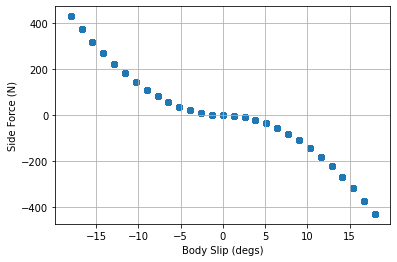

In [182]:
plt.scatter(df["body_slip"]*180/np.pi,df["aero_forces_1"], label = "sideforce")
plt.grid()
plt.ylabel("Side Force (N)")
plt.xlabel("Body Slip (degs)")